In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv('train.csv') #Reading the dataset in a dataframe using Pandas

In [2]:
#df.head(10)
df.describe() #summary of numerical variables
#df['Property_Area'].value_counts()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
#df['ApplicantIncome'].hist(bins=50)
#df.boxplot(column='ApplicantIncome')
#df.boxplot(column='ApplicantIncome', by = 'Education')
#df['LoanAmount'].hist(bins=50)
#df.boxplot(column='LoanAmount')

In [4]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:')
print (temp1)

print ('\nProbality of getting loan for each Credit History class:') 
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probality of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

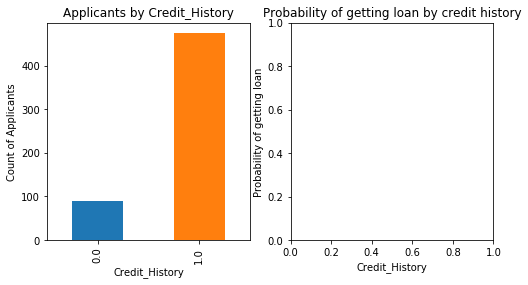

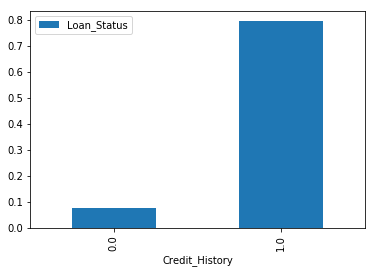

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")


# Combining them in stacked chart
#temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
#temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)


In [6]:
df.apply(lambda x: sum(x.isnull()),axis=0) # Number of missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
 df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
 df['Self_Employed'].fillna('No',inplace=True)    

In [17]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df['LoanAmount'].mean())

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
5      267.000000
6       95.000000
7      158.000000
8      168.000000
9      349.000000
10      70.000000
11     109.000000
12     200.000000
13     114.000000
14      17.000000
15     125.000000
16     100.000000
17      76.000000
18     133.000000
19     115.000000
20     104.000000
21     315.000000
22     116.000000
23     112.000000
24     151.000000
25     191.000000
26     122.000000
27     110.000000
28      35.000000
29     120.000000
          ...    
584    146.000000
585    172.000000
586    104.000000
587     70.000000
588     94.000000
589    106.000000
590     56.000000
591    205.000000
592    292.000000
593    142.000000
594    260.000000
595    110.000000
596    187.000000
597     88.000000
598    180.000000
599    192.000000
600    350.000000
601    155.000000
602    128.000000
603    172.000000
604    496.000000
605    146.412162
606    173.000000
607    157.000000
608    108

In [9]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
#df['LoanAmount_log'].hist(bins=20)

In [10]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
#df['LoanAmount_log'].hist(bins=20) 

In [11]:
df['Dependents'].fillna(value='0',inplace=True)
df['Gender'].fillna(value='Male',inplace=True)
df['Married'].fillna(value='Yes',inplace=True)
df['Loan_Amount_Term'].fillna(value=360.0,inplace=True)
df['Credit_History'].fillna(value=1.0,inplace=True)

df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [12]:
df['LoanAmount_log'].value_counts()

4.986426    22
4.787492    20
4.700480    17
4.605170    15
5.231109    12
5.075174    12
4.727388    11
4.852030    11
4.867534    10
4.553877     9
4.564348     9
4.718499     8
4.744932     8
4.248495     8
4.644391     7
4.912655     7
4.905275     7
4.828314     7
4.882802     7
5.010635     7
4.499810     6
4.969813     6
4.394449     6
4.753590     6
4.927254     6
5.192957     6
5.164786     6
5.062595     6
5.043425     6
4.382027     6
            ..
4.454347     1
6.214608     1
3.583519     1
6.551080     1
5.703782     1
5.717028     1
5.252273     1
4.762174     1
4.442651     1
5.278115     1
5.351858     1
5.913503     1
5.929589     1
4.127134     1
3.970292     1
5.940171     1
5.752573     1
3.850148     1
4.976734     1
2.833213     1
5.247024     1
5.780744     1
3.737670     1
5.342334     1
3.258097     1
5.198497     1
5.463832     1
5.111988     1
4.276666     1
5.497168     1
Name: LoanAmount_log, Length: 204, dtype: int64

In [18]:
#Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into
#numeric by encoding the categories. This can be done using the following code:
df.to_csv('processedLoanDataSet.csv')
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [40]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_splits=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

ImportError: No module named 'sklearn.cross_validation'

In [31]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%


/home/thiago/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: __init__() got multiple values for argument 'n_splits'

In [32]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%


TypeError: __init__() got multiple values for argument 'n_splits'

In [33]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.266946
TotalIncome_log     0.263761
LoanAmount_log      0.228867
Dependents          0.055293
Property_Area       0.049960
Loan_Amount_Term    0.044178
Married             0.027300
Education           0.022723
Gender              0.020824
Self_Employed       0.020148
dtype: float64


In [34]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=4)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','LoanFactor','LoanPortion']
classification_model(model, df,predictor_var,outcome_var)

KeyError: "['LoanFactor' 'LoanPortion'] not in index"

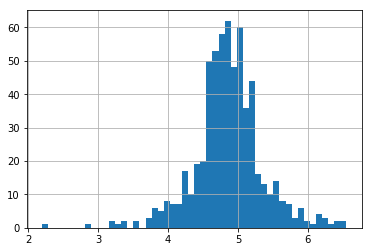

In [35]:
df.head()
df['LoanAmount_log'].hist(bins=50)

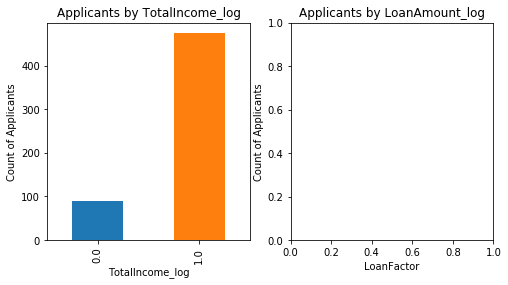

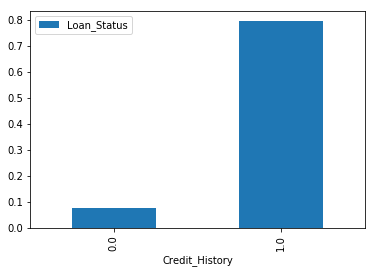

In [36]:
df['LoanFactor'] = df['LoanAmount_log']/df['TotalIncome_log']
df['LoanPortion'] = df['LoanAmount_log']/(df['Loan_Amount_Term'])

#df['TotalIncome_log'].hist(bins=50)
#df['LoanAmount_log'].hist(bins=50)
#df['Credit_History'].hist(bins=50)
#df['LoanFactor'].hist(bins=50)
#df['LoanPortion'].hist(bins=10)

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('TotalIncome_log')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by TotalIncome_log")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('LoanFactor')
ax2.set_ylabel('Count of Applicants')
ax2.set_title("Applicants by LoanAmount_log")
temp2.plot(kind = 'bar')

In [39]:
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth= 5, min_samples_split=4, min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','LoanFactor','LoanPortion']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 83.062%


TypeError: __init__() got multiple values for argument 'n_splits'

In [38]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History     0.737126
LoanFactor         0.107452
TotalIncome_log    0.065724
LoanAmount_log     0.049168
LoanPortion        0.040530
dtype: float64
